In [6]:
from dataloader import load_parquet
#THIS_PATH = os.path.dirname(os.path.realpath(__file__))
MY_FILE = "aisdk-2025-02-27"
df = load_parquet(MY_FILE)
print(df.head())

             MMSI           Timestamp   Latitude  Longitude       SOG  \
0  MMSI=211190000 2025-02-27 00:00:00  54.576005  11.285075  6.866474   
1  MMSI=211190000 2025-02-27 00:06:00  54.596526  11.299219  6.894940   
2  MMSI=211190000 2025-02-27 00:12:00  54.617363  11.312855  6.882426   
3  MMSI=211190000 2025-02-27 00:18:00  54.638601  11.329810  6.293365   
4  MMSI=211190000 2025-02-27 00:24:00  54.650462  11.345175  3.580530   

         COG  Segment             x             y  
0  22.821053      0.0  1.256249e+06  7.280008e+06  
1  20.854054      0.0  1.257823e+06  7.283951e+06  
2  20.786486      0.0  1.259341e+06  7.287955e+06  
3  31.408889      0.0  1.261229e+06  7.292040e+06  
4  41.867500      0.0  1.262939e+06  7.294321e+06  


/zhome/63/7/219953/DeepLearning-1/dataloader.py:168: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df.set_index("Timestamp")
/zhome/63/7/219953/DeepLearning-1/dataloader.py:168: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.set_index("Timestamp")


http://aisdata.ais.dk/!_README_information_CSV_files.txt

SOG =  Speed over ground from AIS message if available

COG = Course over ground from AIS message if available

Segment = Divide track into segments based on timegap (he created this in a script)
"Copilot explanation: " Segment splits a vessel's time-ordered AIS track into contiguous sub-tracks whenever there's a large time gap between consecutive messages. This prevents treating long gaps (e.g., device off, no reception) as part of the same continuous trajector""

MMSI = Marinetime Mobile Service Identity (unique 9 digit identifier)

In [ ]:
# Exploration imports and load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataloader import load_parquet
from dataloader import preprocess_data
from dataloader import plot_paths_on_map
from dataloader import get_ID_by_coords
from dataloader import SlidingWindowDataset
from dataloader import plot_paths_on_map

plt.rcParams['figure.figsize'] = (10, 5)

MY_FILE = "aisdk-2025-02-27"

df = load_parquet(MY_FILE, k=100)
df = preprocess_data(df)
dataset = SlidingWindowDataset(
        df,
        max_diff_per_sequence_minutes=30,
        window_size_minutes=60,
        pred_size_minutes=30,
        stride=12,
    )
x, y = dataset[0]
print(x)
print(y)

/zhome/63/7/219953/DeepLearning-1/dataloader.py:168: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df.set_index("Timestamp")
/zhome/63/7/219953/DeepLearning-1/dataloader.py:168: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.set_index("Timestamp")


tensor([[5.5683e+01, 1.0967e+01, 1.7148e-02, 2.9693e+02],
        [5.5683e+01, 1.0967e+01, 0.0000e+00, 2.4267e+02],
        [5.5683e+01, 1.0967e+01, 0.0000e+00, 6.1100e+01],
        [5.5683e+01, 1.0967e+01, 3.4296e-02, 5.0733e+01],
        [5.5683e+01, 1.0967e+01, 0.0000e+00, 7.4100e+01]])
tensor([[55.6834, 10.9674],
        [55.6835, 10.9674],
        [55.6835, 10.9674],
        [55.6835, 10.9674],
        [55.6835, 10.9674]])


In [ ]:
plot_paths_on_map(df, alpha=0.1, figsize=(12, 8))

In [16]:
# Quick dataset overview
print('\n--- dtypes and non-null counts ---')
df.info()
print('\n--- missing values per column ---')
print(df.isna().sum())

print('\nUnique MMSIs:', df['MMSI'].nunique())
print('Unique Segments:', df[['MMSI','Segment']].drop_duplicates().shape[0])


--- dtypes and non-null counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16522 entries, 0 to 16521
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MMSI       16522 non-null  object        
 1   Timestamp  16522 non-null  datetime64[ns]
 2   Latitude   16522 non-null  float64       
 3   Longitude  16522 non-null  float64       
 4   SOG        16522 non-null  float64       
 5   COG        16522 non-null  float64       
 6   Segment    16522 non-null  float64       
 7   x          16522 non-null  float64       
 8   y          16522 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 1.1+ MB

--- missing values per column ---
MMSI         0
Timestamp    0
Latitude     0
Longitude    0
SOG          0
COG          0
Segment      0
x            0
y            0
dtype: int64

Unique MMSIs: 93
Unique Segments: 108


Total MMSIs: 93

Top 20 MMSIs by number of records:
MMSI
MMSI=209415000    239
MMSI=219008746    239
MMSI=219018892    239
MMSI=219019887    239
MMSI=219022000    239
MMSI=219023833    239
MMSI=219024178    239
MMSI=219026257    239
MMSI=219030656    239
MMSI=219031087    239
MMSI=219032297    239
MMSI=219032932    239
MMSI=219948000    239
MMSI=219965000    239
MMSI=211190000    239
MMSI=256959000    239
MMSI=229673000    239
MMSI=231048000    239
MMSI=232008874    239
MMSI=235106475    239
Name: count, dtype: int64


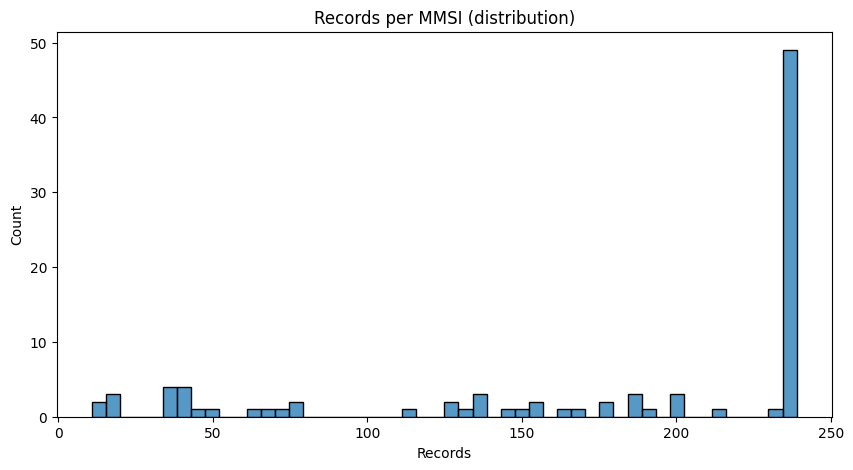

In [17]:
# MMSI frequency and top vessels
mmsi_counts = df['MMSI'].value_counts()
print('Total MMSIs:', len(mmsi_counts))
print('\nTop 20 MMSIs by number of records:')
print(mmsi_counts.head(20))

# Plot distribution of records per MMSI
sns.histplot(mmsi_counts, bins=50)
plt.title('Records per MMSI (distribution)')
plt.xlabel('Records')
plt.show()

Segments total: 108


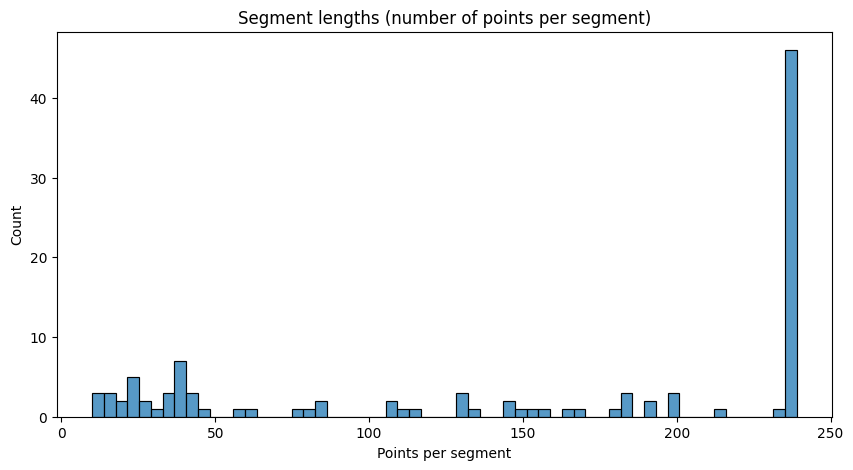

In [18]:
# Segment length distribution (points per segment)
seg_len = df.groupby(['MMSI','Segment']).size().reset_index(name='n')
print('Segments total:', len(seg_len))
seg_len['n'].describe()

sns.histplot(seg_len['n'], bins=60)
plt.title('Segment lengths (number of points per segment)')
plt.xlabel('Points per segment')
plt.show()

Time range: 2025-02-27 00:06:00 to 2025-02-27 23:54:00


/zhome/63/7/219953/.local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


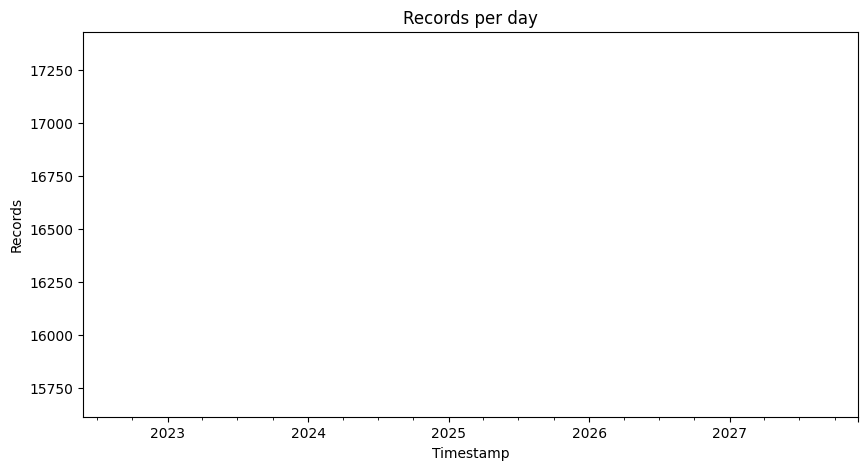

In [19]:
# Time coverage and records per day
# ensure Timestamp is datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print('Time range:', df['Timestamp'].min(), 'to', df['Timestamp'].max())

# records per day
daily = df.set_index('Timestamp').resample('D').size()
daily.plot()
plt.title('Records per day')
plt.ylabel('Records')
plt.show()

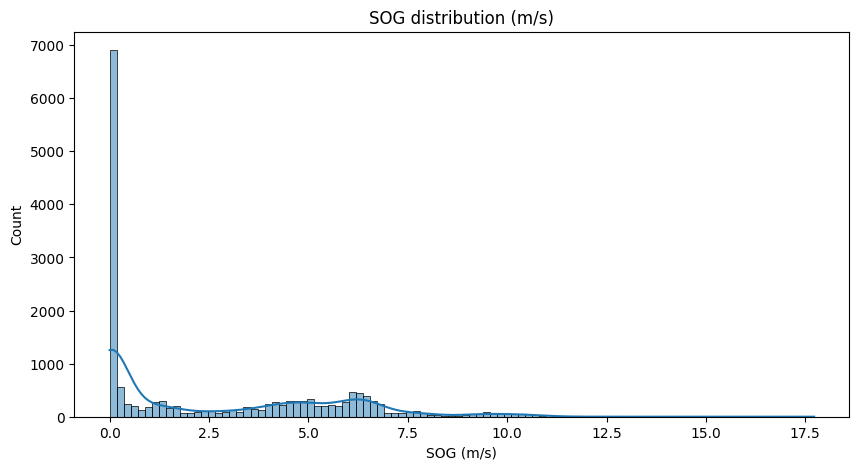

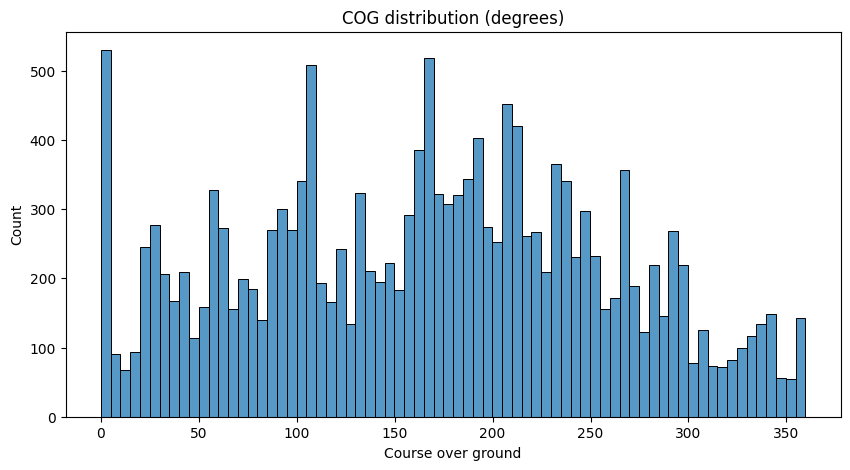

In [20]:
# SOG and COG distributions
sns.histplot(df['SOG'].dropna(), bins=100, kde=True)
plt.title('SOG distribution (m/s)')
plt.xlabel('SOG (m/s)')
plt.show()

sns.histplot(df['COG'].dropna(), bins=72)
plt.title('COG distribution (degrees)')
plt.xlabel('Course over ground')
plt.show()

Sample MMSIs: ['MMSI=209415000', 'MMSI=219008746', 'MMSI=219018892', 'MMSI=219019887', 'MMSI=219022000']


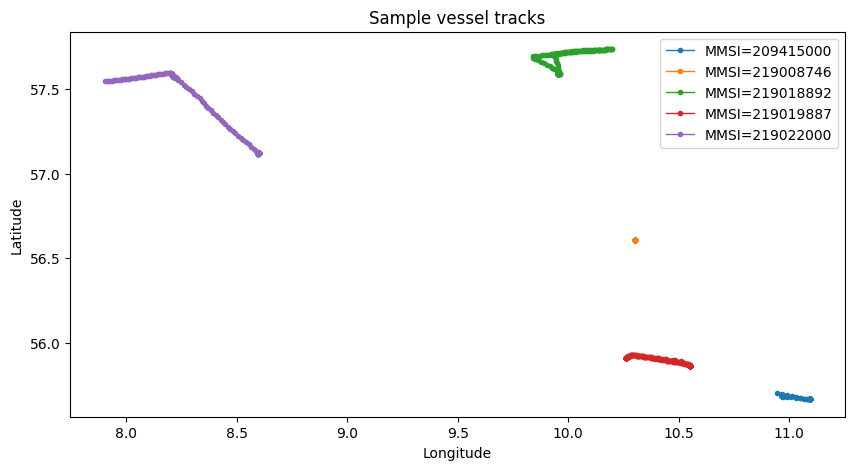

In [21]:
# Map: sample some MMSIs and plot tracks
sample_mmsis = df['MMSI'].value_counts().head(5).index.tolist()
print('Sample MMSIs:', sample_mmsis)

fig, ax = plt.subplots()
for m in sample_mmsis:
    sub = df[df['MMSI']==m].sort_values('Timestamp')
    ax.plot(sub['Longitude'], sub['Latitude'], marker='.', linewidth=1, label=str(m))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Sample vessel tracks')
ax.legend()
plt.show()

In [22]:
# Save cleaned sample for modelling (optional)
# Keep these columns and a sample of segments with at least N points
keep_cols = ['MMSI','Segment','Timestamp','Longitude','Latitude','SOG','COG']
seg_len = df.groupby(['MMSI','Segment']).size().reset_index(name='n')
keep_segments = seg_len[seg_len['n']>=100][['MMSI','Segment']]
keep_df = df.merge(keep_segments, on=['MMSI','Segment'], how='inner')
print('Kept rows for modelling:', keep_df.shape)
# write to a local parquet sample
keep_df.to_parquet('sample_for_modeling.parquet', index=False)
print('Wrote sample_for_modeling.parquet')

Kept rows for modelling: (15206, 9)
Wrote sample_for_modeling.parquet
